In [10]:
from PIL import Image
import numpy as np
from scripts.yolo_finetuning.yolo_inference_onnx import YOLOONNXInference

yolo_inference = YOLOONNXInference(
    model_path='best_so_far.onnx',
    conf_threshold=0.25,
    iou_threshold=0.45,
)

img_path = '../../data/dataset_no_oat_downsample/ecureuil/ecurreuil1872.jpg'

img = Image.open(img_path)

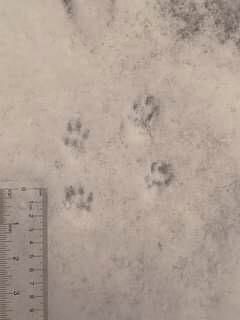

In [11]:
img

In [12]:
img = np.array(img)

print(img.shape)

(320, 240, 3)


In [13]:
bbox_with_score, res = yolo_inference.infer_and_get_best_crop_from_array(image_array=img)
print(bbox_with_score)
print(res.shape)

BBoxWithScore(bbox=[np.float32(135.53365), np.float32(150.1219), np.float32(184.39186), np.float32(204.96465)], score=np.float32(1883.5457), confidence=0.7029418349266052, area=np.float32(2679.5186))
(54, 49, 3)


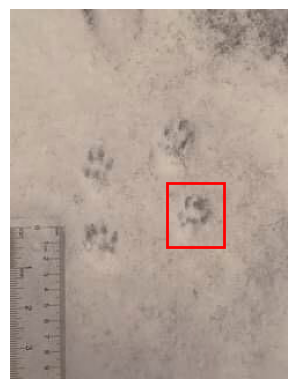

In [14]:
# show bbox on image
import matplotlib.pyplot as plt

def show_bbox_on_image(image_array, bbox_with_score):
    x1, y1, x2, y2 = bbox_with_score.bbox
    plt.imshow(image_array)
    plt.gca().add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none'))
    plt.axis('off')
    plt.show()

show_bbox_on_image(img, bbox_with_score)